# Problem Statement:
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed 
and draw inferences.

*Data Description:*
*Murder* -- Muder rates in different places of United States

*Assualt*- Assualt rate in different places of United States

*UrbanPop* - urban population in different places of United States

*Rape* - Rape rate in different places of United States

# 1.Import Necessary Libraries

In [1]:
import pandas as pd
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [2]:
crime_data=pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# 3.Data Understanding

In [3]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_data.shape                #50 observations & 5 columns

(50, 5)

In [5]:
crime_data.isnull().sum()         #We have no null values

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

#### So i can remove the unnamed column from the data

In [8]:
del crime_data['Unnamed: 0']

In [9]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# 1.Hierarchical Clustering:

>IT is an algorithm that groups similar objects into groups called clusters, And allows us to build tree structures from data similarities.

# Normalizing The Data

In [10]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [11]:
#considering only numerical part of the data
df_norm = norm_func(crime_data.iloc[:,0:])
df_norm.round(2)

,Murder,Assault,UrbanPop,Rape
0,0.75,0.65,0.44,0.36
1,0.55,0.75,0.27,0.96
2,0.44,0.85,0.81,0.61
3,0.48,0.50,0.31,0.32
4,0.49,0.79,1.00,0.86
5,0.43,0.54,0.78,0.81
6,0.15,0.22,0.76,0.10
7,0.31,0.66,0.68,0.22
8,0.88,0.99,0.81,0.64
9,1.00,0.57,0.47,0.48


## Inference:

We can see 50 observations are normalized , And the transformed data is lying with in [0,1]

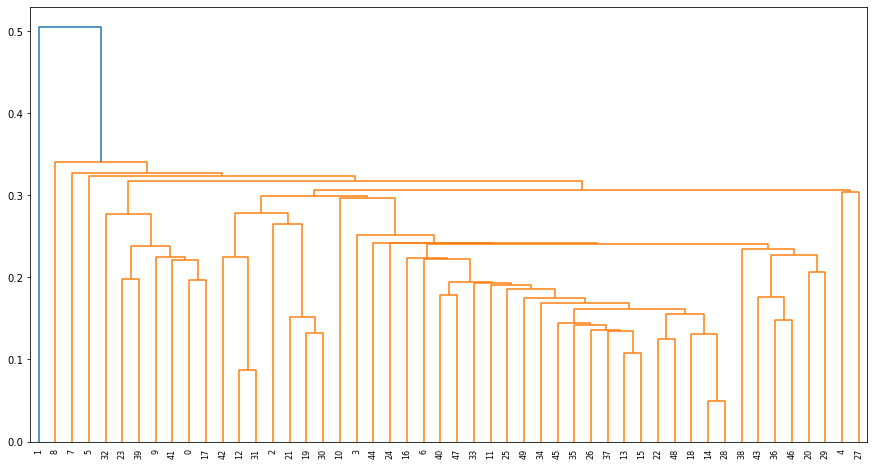

In [12]:
#single linkage reasonably works well on cleaned data and when we have less data
plt.figure(figsize=(15,8))
dendogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [16]:
#creating clusters
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='single')
hc

AgglomerativeClustering(linkage='single')

In [17]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
#creating Clusters column
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Observation:
**We can see only one data point falls into different cluster i.e., in 'cluster-1' and all other data points fall into one cluster i.e., 'cluster-0'**

In [19]:
crime_data['hc_cluster']=Clusters

In [20]:
crime_data

,Murder,Assault,UrbanPop,Rape,hc_cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [21]:
crime_data[crime_data['hc_cluster']==1]

,Murder,Assault,UrbanPop,Rape,hc_cluster
1,10.0,263,48,44.5,1


In [22]:
crime_data[crime_data['hc_cluster']==0]

,Murder,Assault,UrbanPop,Rape,hc_cluster
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
10,5.3,46,83,20.2,0


In [23]:
crime_data[crime_data['hc_cluster']==0].shape

(49, 5)

## Inference:
We can see 49 observations fall into 0th cluster & one datapoint fall into 1-cluster

# ==========================================================

# KMeans Clustering / Center Based Clustering

### >>KMeans is method of cluster analysis using a pre-specified no. of clusters

In [24]:
from sklearn.cluster import KMeans

### Normalizing the data

In [25]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [26]:
km_norm= norm_func(crime_data.iloc[:,0:-1])def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)
km_norm.round(2)

,Murder,Assault,UrbanPop,Rape
0,0.75,0.65,0.44,0.36
1,0.55,0.75,0.27,0.96
2,0.44,0.85,0.81,0.61
3,0.48,0.50,0.31,0.32
4,0.49,0.79,1.00,0.86
5,0.43,0.54,0.78,0.81
6,0.15,0.22,0.76,0.10
7,0.31,0.66,0.68,0.22
8,0.88,0.99,0.81,0.64
9,1.00,0.57,0.47,0.48


# ELBOW Method

In [27]:
#Let us use ELBOW Method to do the cluster analysis

### To find optimum number of cluster the K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

In [28]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    kmeans.fit(km_norm)
    wcss.append(kmeans.inertia_)
   

In [29]:
wcss

[13.184122550256445,
 6.596893867946199,
 5.010878493006419,
 3.683456153585915,
 3.1842618139677223,
 2.870684311901836,
 2.5396491534176064,
 2.3715174070078895,
 2.1073331222994973,
 1.8857777662081805]

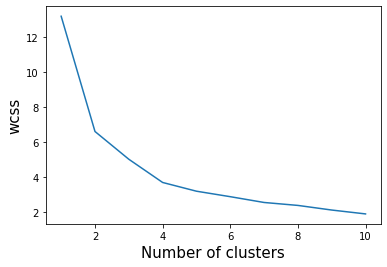

In [34]:
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Number of clusters', size= 15)
plt.ylabel('wcss',size=15)
plt.show()

## Inferene:
   *The ELBOW is at k=2(i.e.,Sum of squared distances falls suddenly) indication the optimum k value for this data set is 2*

## >>And if we are not sure with the k value from ELBOW Method we can also use silhouette score for the confirmation

# Silhouette score:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

In [35]:
silhouette_avg=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    kmeans.fit(km_norm)
    label =kmeans.labels_
    silhouette_avg.append(silhouette_score(km_norm,labels=label))

In [36]:
silhouette_avg

[0.42364457559625074,
 0.3187755079997931,
 0.3408903560074363,
 0.3041807251632636,
 0.29004477391070826,
 0.2843311231434971,
 0.2694017838738178,
 0.23998374603955466,
 0.25105289265175174]

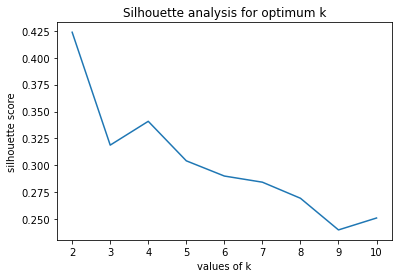

In [37]:
plt.plot(np.arange(2,11),silhouette_avg)
plt.xlabel('values of k')
plt.ylabel('silhouette score')
plt.title('Silhouette analysis for optimum k')
plt.show()

# Inference:
**From silhouette average we can see the highest score is 0.423644 at optimum value of k=2 (we can observe from the graph)**

In [38]:
#So by this we can find number of clusters

# Building Cluster algorithm

In [39]:
from sklearn.cluster import KMeans
kmean_cluster= KMeans(n_clusters=2, random_state=12)
kmean_cluster.fit(km_norm)

KMeans(n_clusters=2, random_state=12)

In [40]:
kmean_cluster.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

# Assigning Clusters to the Data set

In [41]:
crime_data['kmeans_clusters']=kmean_cluster.labels_
crime_data

,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_clusters
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,0,1
9,17.4,211,60,25.8,0,1


In [42]:
crime_data.groupby('kmeans_clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,hc_cluster
,mean,mean,mean,mean,mean
kmeans_clusters,,,,,
0,4.870,114.433333,63.633333,15.943333,0.00
1,12.165,255.250000,68.400000,29.165000,0.05


In [43]:
crime_data[crime_data['kmeans_clusters']==0]

,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_clusters
3,8.8,190,50,19.5,0,0
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
10,5.3,46,83,20.2,0,0
11,2.6,120,54,14.2,0,0
13,7.2,113,65,21.0,0,0
14,2.2,56,57,11.3,0,0
15,6.0,115,66,18.0,0,0
16,9.7,109,52,16.3,0,0
18,2.1,83,51,7.8,0,0


In [44]:
crime_data[crime_data['kmeans_clusters']==0].shape

(30, 6)

# Inference:
    We can see here 30 data points have fallen into 0th cluster

In [45]:
crime_data[crime_data['kmeans_clusters']==1]

,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_clusters
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,0,1
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
8,15.4,335,80,31.9,0,1
9,17.4,211,60,25.8,0,1
12,10.4,249,83,24.0,0,1
17,15.4,249,66,22.2,0,1
19,11.3,300,67,27.8,0,1


In [46]:
crime_data[crime_data['kmeans_clusters']==1].shape

(20, 6)

# Inference:
    We can see that 20 data points have fallen into the 1st cluster

# OBSERVATION:
   Unlike hierarchical clustering it has not taken only one data point into one cluster and other into differnt cluster
Here KMeans clustering has done a good job in groping the data points/ clustering

Therefore we consider KMeans as a best clustering technique among these two

# =======================================================

# DBSCAN Clustering

## It is known as a best clustering technique to detect the noisy data points / outliers

In [47]:
crime_data

,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_clusters
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,0,1
9,17.4,211,60,25.8,0,1


In [48]:
db_data= crime_data.iloc[:,0:-2]
db_data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [49]:
#taking the values in array bcoz it supports the values should be in array format 
array=db_data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

# Standardizing the data

In [50]:
dbs_scalar= StandardScaler().fit(array)
X=dbs_scalar.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Applying DBSCAN Algorithm

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
#epsilon = 1.3 min_samples = 6
dbscan1= DBSCAN(eps=1.3, min_samples=6)
dbscan1.fit(X)

DBSCAN(eps=1.3, min_samples=6)

In [53]:
#Noisy samples are given the label -1.
dbscan1.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2,  1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [54]:
db_clusters1=pd.DataFrame(dbscan1.labels_,columns=['db_cluster'])
db_clusters1

,db_cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [55]:
#epsilon = 1.4 min_samples = 6
dbscan2= DBSCAN(eps=1.4, min_samples=6)
dbscan2.fit(X)

DBSCAN(eps=1.4, min_samples=6)

In [56]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

### Here we can see only one cluster and 2 noisy points as we increase the radius/ epsilon value from1.3 to 1.4

In [57]:
db_clusters2=pd.DataFrame(dbscan2.labels_,columns=['db_cluster'])
db_clusters2

,db_cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Infernce:
  The noisy points and number of clusters depends on the value of epsilon & number of minimum samples

# THE END!